# Analyzing Ford Go Bike's data - Feb 2019

Definitions:

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer)

## Gathering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(("full-201902-fordgobike.csv"), dtype={'start_station_id':str,'end_station_id':str})

## Assessing

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df['start_station_name'].nunique()

329

In [6]:
df['bike_id'].nunique()

4646

### What is the structure of your dataset?

There are 183,412 trips in this dataset in Feb 2019 in San Francisco with information of each trip's starting station (station name, id, longtitude, latitude), end station (station name, id, longtitude, latitude), start time (date & hour), end time (date & hour), duration, who the rider was (their gender, age, user type), and which bike it was (shared bike or not, and bike id).

There are 329 stations in San Francisco, and a total of 4646 bikes.

### What is/are the main feature(s) of interest in your dataset?

1) I'm interested in investigating which stations are operating at their max capacity, and which stations are operating at a lost.

2) Besides that, I want to know which days and hours are the busiest and least busy, and some strategies to maximize the "dead hours" (least busy).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1) I think that other features like duration span and number of bikes are parked at each stations would be good indicators to determine which stations are operating at their fullest capacity or at a loss.

2) I think other demographic data such as member's birth year, gender, and user type can help me understand the peak days and hours better.

### Data needs to be cleaned

#### Quality issues

Fill empty values

Change bike_id from int64 to object

#### Tidiness issues

Seperate date and time

## Cleaning

In [7]:
# Make a new dataset df1
df1 = df

#### Fill empty values

Code

In [8]:
df1 = df1.fillna(0)

Test

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  object 
 4   start_station_name       183412 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  object 
 8   end_station_name         183412 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        183412 non-null  float64
 14  memb

#### Change bike_id from int64 to object

Code

In [10]:
df1['bike_id'] = df1['bike_id'].astype(str)

Test

In [11]:
print(df1['bike_id'].dtypes)

object


#### Change member birth year to int

Code

In [12]:
df1['member_birth_year'] = df1['member_birth_year'].astype(int)

Check

In [13]:
print(df1['member_birth_year'].dtypes)

int32


#### Change start_time and end_time to date and time

Code

In [14]:
df1['start_time'] = pd.to_datetime(df.start_time)

In [15]:
df1['end_time'] = pd.to_datetime(df.end_time)

Test

In [16]:
print(df1['start_time'].dtypes)

datetime64[ns]


In [17]:
print(df1['end_time'].dtypes)

datetime64[ns]


#### Seperate start_time and end_timeto hour, date, day, month and year

Code

In [18]:
df1['start_hour'] = df1.start_time.dt.strftime('%H')
df1['start_date'] = df1.start_time.dt.strftime('%Y-%m-%d')
df1['start_day'] = df1.start_time.dt.strftime('%A')

In [19]:
df1['end_hour'] = df1.end_time.dt.strftime('%H')
df1['end_date'] = df1.end_time.dt.strftime('%Y-%m-%d')
df1['end_day'] = df1.end_time.dt.strftime('%A')

Test

In [20]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_date,start_day,end_hour,end_date,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17,2019-02-28,Thursday,08,2019-03-01,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,Customer,0,0,No,18,2019-02-28,Thursday,06,2019-03-01,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12,2019-02-28,Thursday,05,2019-03-01,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17,2019-02-28,Thursday,04,2019-03-01,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23,2019-02-28,Thursday,00,2019-03-01,Friday


## Exploration

### Univariate

In [21]:
df1_gender = df1['member_gender'].value_counts()
df1_gender

Male      130651
Female     40844
0           8265
Other       3652
Name: member_gender, dtype: int64

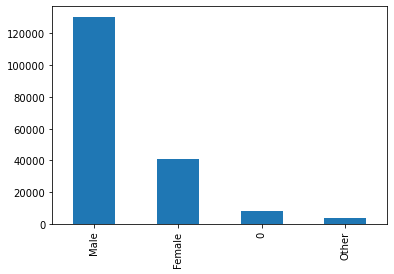

In [22]:
df1_gender.plot(kind='bar')

Male users are dominant, is 3 times higher than female users, and is 10 times higher with users who identified their gender as other. 

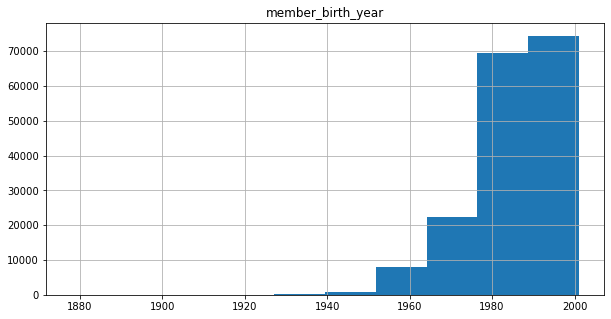

In [23]:
df1_birth = df1[df1['member_birth_year'] != 0]
df1_birth.hist(column='member_birth_year', figsize=(10,5));

The chart is highly left skewed with most members are from 1975 to 2002.

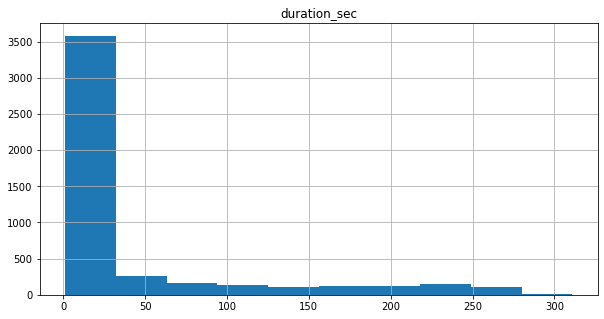

In [24]:
df1_duration = pd.DataFrame(df1['duration_sec'].value_counts())
df1_duration = df1_duration.sort_values(by='duration_sec', ascending = True)
df1_duration.hist(column='duration_sec', figsize=(10,5));

This chart is highly right skewed. We can see that most of the trips are less than 250 secons. Only around 30 trips have the duration span exceeds 3000s. Thus, most of people are using ford bike to commute at a short distance.

In [25]:
# create a new dataset from df1 for this 
# only keep rows where start_station_id & end_station_id != 0
df2 = df1[(df1.start_station_id != '0') & (df1.end_station_id != '0')]

In [26]:
start_station = pd.DataFrame(df2['start_station_name'].value_counts())
end_station = pd.DataFrame(df2['end_station_name'].value_counts())

In [27]:
station_array = df2['start_station_name'].unique()

In [28]:
# combine thew two datasets start_station and end_station by index
station = pd.concat([start_station, end_station], axis=1)
# change column names to start and end
station = station.rename(columns={'start_station_name':'start', 'end_station_name':'end'})
# create column total calculating the sum of start and end
station['total'] = station['start'] + station['end']
# view the station with most visits to least by sprting total with ascending == False
station = station.sort_values(by='total', ascending=False)

station

,start,end,total
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544,4857,8401
Market St at 10th St,3904,3973,7877
Montgomery St BART Station (Market St at 2nd St),2895,3647,6542
San Francisco Ferry Building (Harry Bridges Plaza),2710,3368,6078
Berry St at 4th St,3052,2872,5924
...,...,...,...
Parker Ave at McAllister St,7,9,16
Willow St at Vine St,9,5,14
Palm St at Willow St,4,7,11
21st Ave at International Blvd,4,6,10


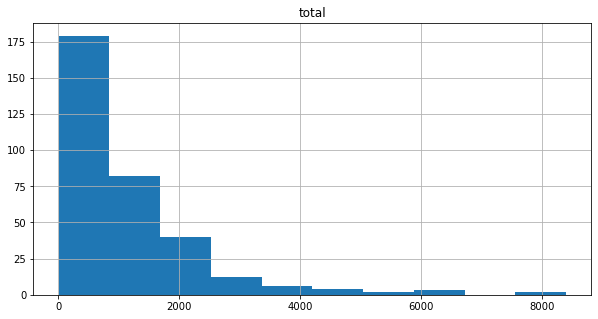

In [29]:
station.hist(column='total', figsize=(10,5));

Most of the stations have 1111 visits per day.

There are 25% of the station have 319 or less visits per day.

There are 50% of the stations have 320 to 1520 per day.

And there are 25% that are doing extraordinarily well with 1521 to 8401 visits per day.

In [30]:
station.describe()

,start,end,total
count,330.000000,330.000000,330.000000
mean,555.793939,555.793939,1111.587879
std,580.327064,629.439781,1204.842057
min,2.000000,5.000000,8.000000
25%,158.500000,163.500000,319.500000
50%,388.500000,370.500000,762.000000
75%,772.000000,764.750000,1520.500000
max,3904.000000,4857.000000,8401.000000


In [31]:
df1 = df1[df1['member_gender'] != 0]
gender = df1.groupby(by='member_gender').mean()
gender = gender[['duration_sec']]

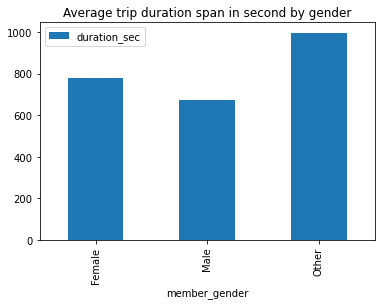

In [32]:
gender.plot(kind='bar', title='Average trip duration span in second by gender')

Bikers who identified their genders as 'Other' has the highest average duration span of 997 seconds or around 16.5 minutes.

Female bikers has the average trip span of 779 which is equivalent to 13 minutes.

Male bikers has the shortest trip span of 672 seconds or 11 minutes.

This could be Male bikers take shorter distance trips than Other and Female bikers, or it could be Male bikers have higher average speed. In order to investigate this indeth, we would need more data on trip distance and average speed.

In [33]:
gender

,duration_sec
member_gender,
Female,779.070390
Male,672.639069
Other,996.515334


### Bivariate

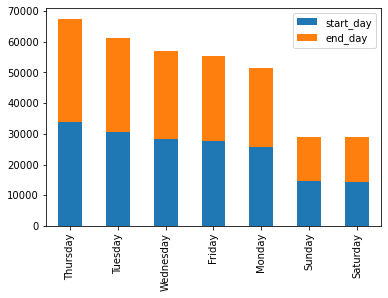

In [34]:
df1_start_day = pd.DataFrame(df1['start_day'].value_counts())
df1_end_day = pd.DataFrame(df1['end_day'].value_counts())
df1_day = df1_start_day.join(df1_end_day, how='outer')
df1_day.plot(kind='bar', stacked=True)

Thursdays have highest number of trips with a total of 70382. Follwing by Tuesdays with 63,633 trips. On Mondays, Wednesdays and Fridays have somewhere from 53,000 to over 59,000 trips.

Saturday and Sunday have significantly lower trips than weekdays with only 30,818 and 31,046 trips respectively which are half of the total trips on Tuesdays and less than half of total trips on Thursdays. 

One of the reason this happens could be the majority of users only come to San Francisco during weekdays to work or use Ford bikes to commute to work. One thing Ford can do to boost the bikes usage during weekend is targeting tourists who usually spend weekends in San Francisco.

In [35]:
df1_day

,start_day,end_day
Thursday,33733,33728
Tuesday,30616,30623
Wednesday,28456,28447
Friday,27682,27674
Monday,25686,25686
Sunday,14532,14539
Saturday,14442,14450


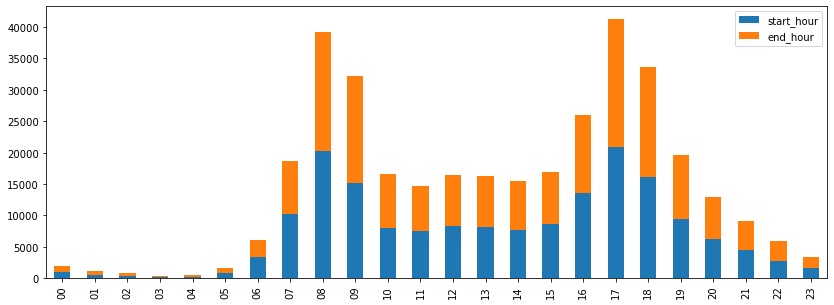

In [36]:
df1_start_hour = pd.DataFrame(df1['start_hour'].value_counts())
df1_end_hour = pd.DataFrame(df1['end_hour'].value_counts())
df1_hour = df1_start_hour.join(df1_end_hour, how='outer')
df1_hour.plot(kind='bar', stacked=True, figsize=(14,5))

The most common start and end hours in the morning is from 8 to 9, and in the afternoon is from 17 to 18 also known as the rush hours. This again confirms the theory that most of the riders are professionals who use Ford bikes to commute to work. 

In [37]:
df1_hour

,start_hour,end_hour
00,893,965
01,525,541
02,356,406
03,164,168
04,227,225
05,866,738
06,3294,2803
07,10235,8450
08,20242,19027
09,15221,16988


In [38]:
df_user = {'customer':[((df1['user_type'] == 'Customer') & (df1['member_gender'] == 'Other')).sum(), ((df1['user_type'] == 'Customer') & (df1['member_gender'] == 'Female')).sum(), ((df1['user_type'] == 'Customer') & (df1['member_gender'] == 'Male')).sum()],
        'subscriber':[((df1['user_type'] == 'Subscriber') & (df1['member_gender'] == 'Other')).sum(), ((df1['user_type'] == 'Subscriber') & (df1['member_gender'] == 'Female')).sum(), ((df1['user_type'] == 'Subscriber') & (df1['member_gender'] == 'Male')).sum()]}
gender_index = ['Other','Female', 'Male']
df_user = pd.DataFrame(df_user, index=gender_index)

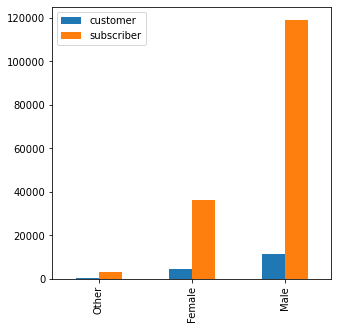

In [39]:
df_user.plot(kind='bar', figsize=(5,5))

Compared to number of customers, number of subcribers are over 7 times higher in Other, over 8 times higher in Female, and over 10 times higher in Male. On average, number of subcribers is 8.5 higher than number of customers. This is a good metric to have as more subscribers mean higher user retention, user returns and life time values.

However, the number of Male customers is 2.5 times higher than Female customers and is 25 times higher than Other customers; And the number of Male subscribers is 3 times higher than Female subscribers, and is 38 times higher than Other subscribers, despite Other and Female have higher trip duration on average.

Ford Go Bike service clearly attracts more Male users than Female and Other users. Ford Go Bike team should do in-depth persona research and user interviews to find out why their product and service do not attract Female and Other users that well.

In [40]:
df_user

,customer,subscriber
Other,455,3197
Female,4647,36197
Male,11529,119122


### Multivariates

In [41]:
start_day1 = pd.DataFrame(df1.groupby('start_day').mean()['duration_sec'])
end_day1 = pd.DataFrame(df1.groupby('end_day').mean()['duration_sec'])
start_day1 = start_day1.rename(columns={'duration_sec':'start_day'})
end_day1 = end_day1.rename(columns={'duration_sec':'end_day'})                     
df1_day1 = start_day1.join(end_day1, how='outer')

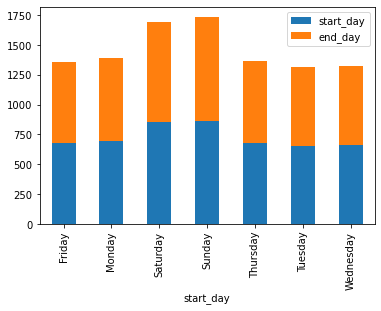

In [42]:
df1_day1.plot(kind='bar', stacked=True)

Saturday and Sunday have the highest trip duration compare to other week days. People may have more spare time during weekend to take longer trips.

In [43]:
df1_day1

,start_day,end_day
start_day,,
Friday,681.507189,676.563634
Monday,697.104064,691.823678
Saturday,850.583299,841.912872
Sunday,859.202243,875.019809
Thursday,678.421338,687.227526
Tuesday,652.897015,658.240734
Wednesday,665.060514,654.674201


In [44]:
start_hour1 = pd.DataFrame(df1.groupby('start_hour').mean()['duration_sec'])
end_hour1 = pd.DataFrame(df1.groupby('end_hour').mean()['duration_sec'])

start_hour1 = start_hour1.rename(columns={'duration_sec':'start_hour'})
end_hour1 = end_hour1.rename(columns={'duration_sec':'end_hour'})

df1_hour1 = start_hour1.join(end_hour1, how='outer')

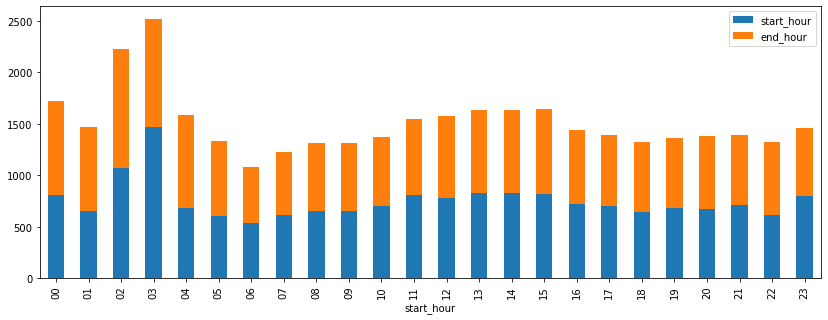

In [45]:
df1_hour1.plot(kind='bar', stacked=True, figsize=(14,5))

Interestingly the trips start and end early in the morning between 2 to 3 have the longest duration span qith 14 minutes on average versus the trips commute during rush hours 7 to 8 with 10 minutes on average and 17 to 18 with 11 minutes.

In [46]:
df1_hour1

,start_hour,end_hour
start_hour,,
00,808.895857,912.940933
01,652.451429,818.715342
02,1067.620787,1158.184729
03,1471.884146,1041.815476
04,685.189427,896.564444
05,601.254042,732.925474
06,534.712508,544.757046
07,613.838202,609.997278
08,656.268551,654.341567


In [47]:
df1['bike_id'].nunique()

4635

In [48]:
start_bike = pd.DataFrame(df1.groupby('start_station_name')['bike_id'].nunique())
end_bike = pd.DataFrame(df1.groupby('end_station_name')['bike_id'].nunique())

start_bike = start_bike.rename(columns={'bike_id':'start'})
end_bike = end_bike.rename(columns={'bike_id':'end'})

station_bike = start_bike.join(end_bike, how='outer')
station_bike['total'] = (station_bike['start'] + station_bike['end'])
station_bike['average'] = (station_bike['total'] / 28)

station_bike = station_bike[station_bike.index !=0]
station_bike = station_bike.sort_values(by='total', ascending=False)

In [49]:
most_bikes = station_bike[station_bike['average'] >= 90]

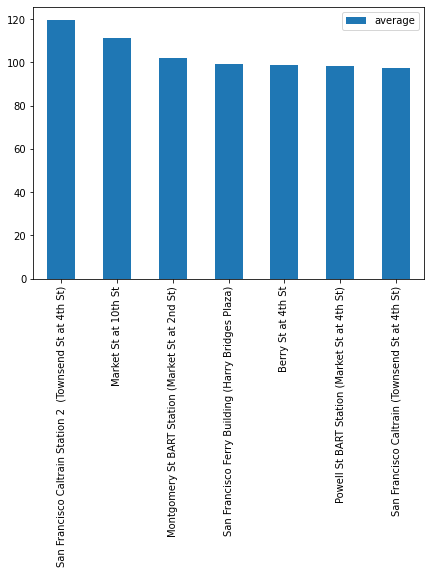

In [50]:
most_bikes[['average']].plot(kind='bar', figsize=(7,5))

In [51]:
most_bikes

,start,end,total,average
San Francisco Caltrain Station 2 (Townsend St at 4th St),1571,1783,3354,119.785714
Market St at 10th St,1543,1569,3112,111.142857
Montgomery St BART Station (Market St at 2nd St),1295,1561,2856,102.000000
San Francisco Ferry Building (Harry Bridges Plaza),1298,1485,2783,99.392857
Berry St at 4th St,1410,1355,2765,98.750000
Powell St BART Station (Market St at 4th St),1326,1428,2754,98.357143
San Francisco Caltrain (Townsend St at 4th St),1322,1400,2722,97.214286


In [52]:
least_bikes = station_bike[station_bike['average'] < 1]

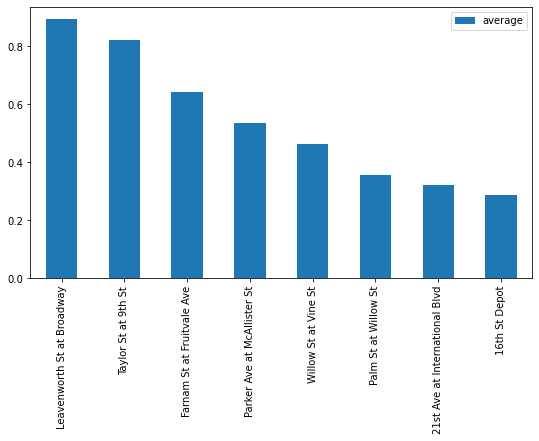

In [53]:
least_bikes[['average']].plot(kind='bar', figsize=(9,5))

In [54]:
least_bikes

,start,end,total,average
Leavenworth St at Broadway,13,12,25,0.892857
Taylor St at 9th St,13,10,23,0.821429
Farnam St at Fruitvale Ave,8,10,18,0.642857
Parker Ave at McAllister St,7,8,15,0.535714
Willow St at Vine St,8,5,13,0.464286
Palm St at Willow St,3,7,10,0.357143
21st Ave at International Blvd,4,5,9,0.321429
16th St Depot,2,6,8,0.285714


These 8 stations usually does not have any bike available. This could be a factor that drove riders away at these stations since riders could be worried that they won't be likely to find an available bike at these stations.

## Explaination

### Time

In [55]:
time = df1[['start_date','end_date','duration_sec','start_hour','end_hour','start_day','end_day']]
time.head()

,start_date,end_date,duration_sec,start_hour,end_hour,start_day,end_day
0,2019-02-28,2019-03-01,52185,17,08,Thursday,Friday
2,2019-02-28,2019-03-01,61854,12,05,Thursday,Friday
3,2019-02-28,2019-03-01,36490,17,04,Thursday,Friday
4,2019-02-28,2019-03-01,1585,23,00,Thursday,Friday
5,2019-02-28,2019-03-01,1793,23,00,Thursday,Friday


#### Total trips by week days

In [56]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [57]:
start_day = pd.DataFrame(time['start_day'].value_counts(), index=day)
end_day = pd.DataFrame(time['end_day'].value_counts(), index=day)
trip_per_day = pd.concat([start_day, end_day], axis=1)
trip_per_day['total'] = (trip_per_day['start_day'] + trip_per_day['end_day'])

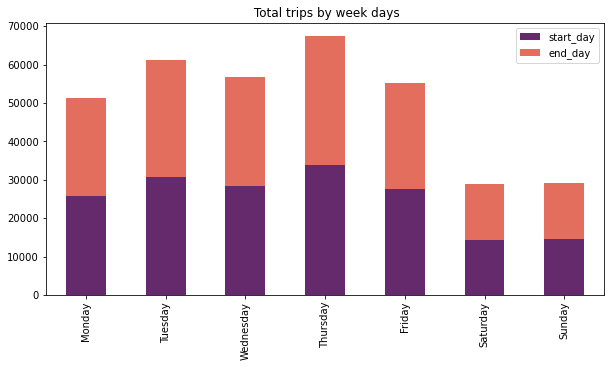

In [146]:
trip_per_day[['start_day','end_day']].plot(kind='bar', stacked=True, figsize=(10,5), color=['#652a6b','#e46e5e'], title=' Total trips by week days')

Thursdays have highest number of trips with a total of 67,461. Follwing by Tuesdays with 61,239 trips. On Mondays, Wednesdays and Fridays have somewhere from 51,000 to over 55,000 trips.

Saturday and Sunday have significantly lower trips than weekdays with only 30,818 and 31,046 trips respectively which are half of the total trips on Tuesdays and less than half of total trips on Thursdays. 

One of the reason this happens could be the majority of users only come to San Francisco during weekdays to work or use Ford bikes to commute to work. One thing Ford can do to boost the bikes usage during weekend is targeting tourists who usually spend weekends in San Francisco.

In [59]:
trip_per_day

,start_day,end_day,total
Monday,25686,25686,51372
Tuesday,30616,30623,61239
Wednesday,28456,28447,56903
Thursday,33733,33728,67461
Friday,27682,27674,55356
Saturday,14442,14450,28892
Sunday,14532,14539,29071


#### Total trips by hours

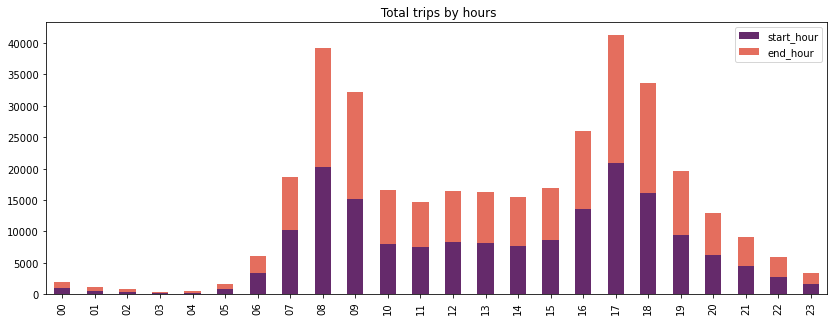

In [145]:
start_hour = pd.DataFrame(time['start_hour'].value_counts())
end_hour = pd.DataFrame(time['end_hour'].value_counts())
hour = start_hour.join(df1_end_hour, how='outer')
hour.plot(kind='bar', stacked=True, figsize=(14,5), color=['#652a6b','#e46e5e'], title=' Total trips by hours')

The most common start and end hours in the morning is from 8 to 9, and in the afternoon is from 17 to 18 also known as the rush hours. This again confirms the theory that most of the riders are professionals who use Ford bikes to commute to work. 

In [61]:
hour

,start_hour,end_hour
00,893,965
01,525,541
02,356,406
03,164,168
04,227,225
05,866,738
06,3294,2803
07,10235,8450
08,20242,19027
09,15221,16988


In [62]:
start_hour_day = {'7 AM':[((time['start_day']=='Monday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='07')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='07')).sum()],
            '8 AM':[((time['start_day']=='Monday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='08')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='08')).sum()],
            '9 AM':[((time['start_day']=='Monday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='09')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='09')).sum()],
            '10 AM':[((time['start_day']=='Monday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='10')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='10')).sum()],
            '11 AM':[((time['start_day']=='Monday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='11')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='11')).sum()],
            '12 PM':[((time['start_day']=='Monday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='12')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='12')).sum()],
            '1 PM':[((time['start_day']=='Monday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='13')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='00')).sum()],
            '2 PM':[((time['start_day']=='Monday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='14')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='14')).sum()],
            '3 PM':[((time['start_day']=='Monday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='15')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='15')).sum()],
            '4 PM':[((time['start_day']=='Monday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='16')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='16')).sum()],
            '5 PM':[((time['start_day']=='Monday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='17')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='17')).sum()],
            '6 PM':[((time['start_day']=='Monday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='18')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='18')).sum()],
            '7 PM':[((time['start_day']=='Monday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Tuesday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Wednesday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Thursday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Friday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Saturday') & (time['start_hour']=='19')).sum(),
                  ((time['start_day']=='Sunday') & (time['start_hour']=='19')).sum()]}
 
start_hour_day = pd.DataFrame(data=start_hour_day, index=day)           

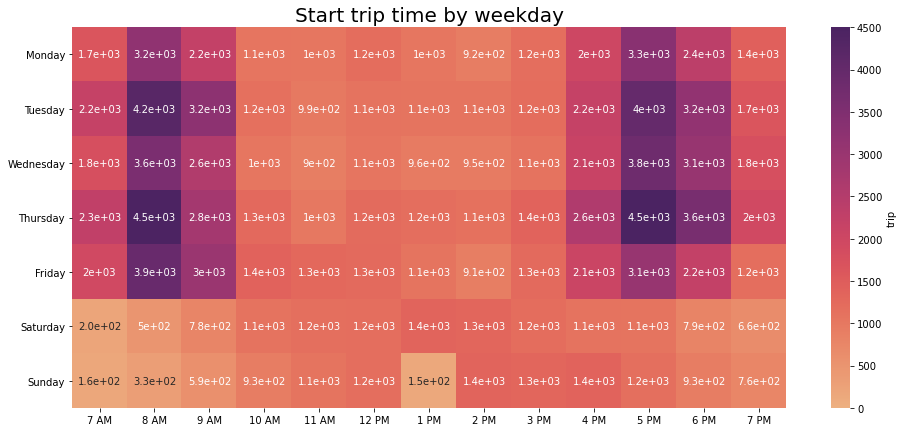

In [121]:
plt.figure(figsize=(16,7))
plt.title("Start trip time by weekday", fontsize=20)
sb.heatmap(start_hour_day, vmin=0, vmax=4500, cmap='flare', annot=True, annot_kws={'size':10}, cbar_kws={'label': 'trip'})

Most trip starts at 08 in the morning and again at 17 in the afternoon, following by trips start at 09 and 18. Tuesday and Thursday have the highest number of trips. Saturday and Sunday have the lowest number of trips.

In [64]:
start_hour_day

,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM
Monday,1653,3195,2231,1055,1044,1200,1044,915,1190,2006,3309,2366,1425
Tuesday,2185,4239,3239,1154,988,1094,1088,1081,1196,2190,3973,3150,1659
Wednesday,1803,3584,2576,1049,902,1066,958,952,1099,2128,3818,3054,1785
Thursday,2269,4475,2809,1283,1010,1247,1180,1133,1386,2595,4519,3624,1967
Friday,1958,3926,2991,1406,1284,1262,1083,909,1256,2090,3053,2217,1178
Saturday,205,497,781,1105,1167,1182,1361,1335,1204,1105,1079,792,662
Sunday,162,326,594,928,1078,1186,154,1369,1326,1378,1170,930,756


In [65]:
end_hour_day = {'7 AM':[((time['end_day']=='Monday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='07')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='07')).sum()],
            '8 AM':[((time['end_day']=='Monday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='08')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='08')).sum()],
            '9 AM':[((time['end_day']=='Monday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='09')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='09')).sum()],
            '10 AM':[((time['end_day']=='Monday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='10')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='10')).sum()],
            '11 AM':[((time['end_day']=='Monday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='11')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='11')).sum()],
            '12 PM':[((time['end_day']=='Monday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='12')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='12')).sum()],
            '1 PM':[((time['end_day']=='Monday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='13')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='00')).sum()],
            '2 PM':[((time['end_day']=='Monday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='14')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='14')).sum()],
            '3 PM':[((time['end_day']=='Monday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='15')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='15')).sum()],
            '4 PM':[((time['end_day']=='Monday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='16')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='16')).sum()],
            '5 PM':[((time['end_day']=='Monday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='17')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='17')).sum()],
            '6 PM':[((time['end_day']=='Monday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='18')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='18')).sum()],
            '7 PM':[((time['end_day']=='Monday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Tuesday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Wednesday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Thursday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Friday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Saturday') & (time['end_hour']=='19')).sum(),
                  ((time['end_day']=='Sunday') & (time['end_hour']=='19')).sum()]}
 
end_hour_day = pd.DataFrame(data=end_hour_day, index=day)           

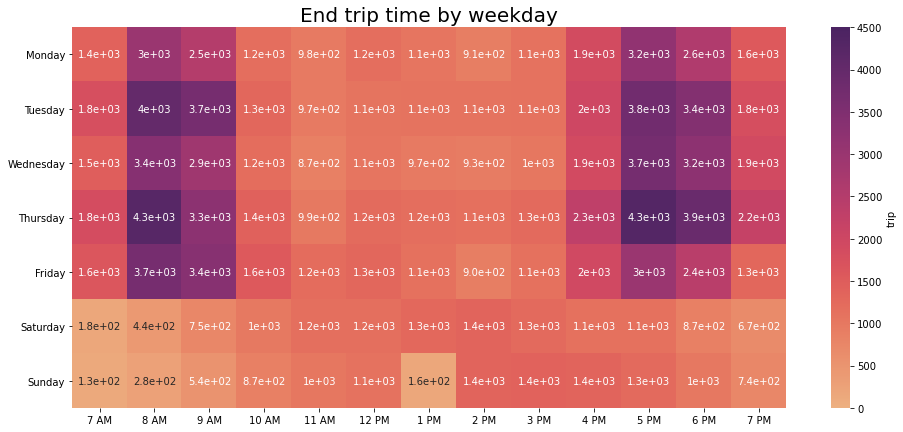

In [122]:
plt.figure(figsize=(16,7))
plt.title("End trip time by weekday", fontsize=20)
sb.heatmap(end_hour_day, vmin=0, vmax=4500, cmap='flare', annot=True, annot_kws={'size':10}, cbar_kws={'label': 'trip'})

Most trip starts at 08 in the morning and again at 17 in the afternoon, following by trips start at 09 and 18. Tuesday and Thursday have the highest number of trips. Saturday and Sunday have the lowest number of trips.

In [67]:
end_hour_day

,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM
Monday,1401,2994,2513,1190,975,1187,1067,906,1121,1883,3168,2597,1572
Tuesday,1794,4011,3659,1313,971,1084,1094,1099,1118,1989,3776,3441,1823
Wednesday,1484,3382,2906,1200,866,1065,974,933,1025,1913,3680,3247,1928
Thursday,1846,4261,3254,1419,989,1234,1186,1144,1262,2316,4321,3912,2193
Friday,1619,3661,3364,1565,1215,1314,1130,905,1133,1953,2993,2413,1310
Saturday,175,438,751,996,1172,1161,1285,1358,1253,1126,1139,866,668
Sunday,131,280,541,868,1033,1113,162,1371,1390,1366,1262,1011,740


### Demography

In [68]:
demo = df1[['duration_sec','user_type','member_birth_year','member_gender','bike_share_for_all_trip']]
demo = demo.rename(columns={'member_birth_year':'birth_year', 'member_gender':'gender', 'bike_share_for_all_trip':'bike_share'})
demo

,duration_sec,user_type,birth_year,gender,bike_share
0,52185,Customer,1984,Male,No
2,61854,Customer,1972,Male,No
3,36490,Subscriber,1989,Other,No
4,1585,Subscriber,1974,Male,Yes
5,1793,Subscriber,1959,Male,No
...,...,...,...,...,...
183407,480,Subscriber,1996,Male,No
183408,313,Subscriber,1984,Male,No
183409,141,Subscriber,1990,Male,Yes
183410,139,Subscriber,1988,Male,No


#### Members' birth years

In [69]:
demo = demo[demo['birth_year'] >= 1926]

In [70]:
generation = {'User':[(demo['birth_year'] <= 1945).sum(),
              ((demo['birth_year'] >= 1946) & (demo['birth_year'] <= 1965)).sum(),
              ((demo['birth_year'] >= 1966) & (demo['birth_year'] <= 1980)).sum(),
              ((demo['birth_year'] >= 1981) & (demo['birth_year'] <= 1995)).sum(),
              (demo['birth_year'] >= 1996).sum(),
             (demo['birth_year']>=1926).sum()]}
gen_axis = ['Silent', 'Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Total']
generation = pd.DataFrame(generation, index=gen_axis)

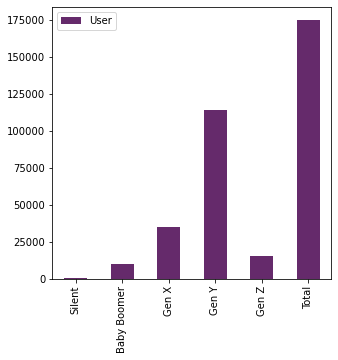

In [147]:
generation.plot(kind='bar', figsize=(5,5), color=['#652a6b'])

Although the Silent generation only makes up a very small part of the total users (only 0.001%), it would be cool for Ford Go Bike to use this data to show the diversity in user age span, or even run a marketing campaign based on real customers' testimonials to show how simple and smooth the product is that even your grandma and grandpa would ride them.

Baby Boomers makes up of 6% of the total users pool with 10,254 users. Following is Gen Z with 15,569 users which is 9% of the users pool. Gen X makes up 1/5th of users pool with 15,569 users.

The majority of users are Gen Y with 112,892 which is 65% of the pool.

Ford may want to run more marketing campaigns targeting Bababy Boomers, Gen Z and Gen X to attract more users from this age group.

Although the Silent generation only makes up a very small part of the total users (only 0.001%), it would be cool for Ford Go Bike to use this data to show the diversity in user age span, or even run a marketing campaign based on real customers' testimonials to show how simple and smooth the product is that even your grandma and grandpa would ride them.

Baby Boomers makes up of 6% of the total users pool with 10,254 users. Following is Gen Z with 15,569 users which is 9% of the users pool. Gen X makes up 1/5th of users pool with 15,569 users.

The majority of users are Gen Y with 112,892 which is 65% of the pool.

Ford may want to run more marketing campaigns targeting Bababy Boomers, Gen Z and Gen X to attract more users from this age group.

In [72]:
generation

,User
Silent,295
Baby Boomer,10254
Gen X,35062
Gen Y,113892
Gen Z,15569
Total,175072


#### User demography heatmap

In [114]:
Female = pd.DataFrame([demo.query('gender == "Female" & birth_year >= 1926').birth_year.count(),
                       demo.query('gender == "Female" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('gender == "Female" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('gender == "Female" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('gender == "Female" & birth_year >= 1996').birth_year.count()])
Female = Female.rename(columns={0:"Female"})


Male = pd.DataFrame([demo.query('gender == "Male" & birth_year >= 1926').birth_year.count(),
                     demo.query('gender == "Male" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('gender == "Male" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('gender == "Male" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('gender == "Male" & birth_year >= 1996').birth_year.count()])
Male = Male.rename(columns={0:"Male"})


Other = pd.DataFrame([demo.query('gender == "Other" & birth_year >= 1926').birth_year.count(),
                      demo.query('gender == "Other" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('gender == "Other" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('gender == "Other" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('gender == "Other" & birth_year >= 1996').birth_year.count()])
Other = Other.rename(columns={0:"Other"})

All_genders = pd.DataFrame([demo.query('gender == ["Male","Other"] & birth_year >= 1926').birth_year.count(),
                      demo.query('gender == ["Male","Other"] & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('gender == ["Male","Other"] & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('gender == ["Male","Other"] & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('gender == ["Male","Other"] & birth_year >= 1996').birth_year.count()])
All_genders = All_genders.rename(columns={0:"All genders"})

Subscriber = pd.DataFrame([demo.query('user_type == "Subscriber" & birth_year >= 1926').birth_year.count(),
                           demo.query('user_type == "Subscriber" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('user_type == "Subscriber" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('user_type == "Subscriber" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('user_type == "Subscriber" & birth_year >= 1996').birth_year.count()])
Subscriber = Subscriber.rename(columns={0:"Subscriber"})


Customer = pd.DataFrame([demo.query('user_type == "Customer" & birth_year >= 1926').birth_year.count(),
                         demo.query('user_type == "Customer" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('user_type == "Customer" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('user_type == "Customer" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('user_type == "Customer" & birth_year >= 1996').birth_year.count()])
Customer = Customer.rename(columns={0:"Customer"})

All_usertypes = pd.DataFrame([demo.query('user_type == ["Subscriber", "Customer"] & birth_year >= 1926').birth_year.count(),
                         demo.query('user_type == ["Subscriber", "Customer"] & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('user_type == ["Subscriber", "Customer"]& birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('user_type == ["Subscriber", "Customer"] & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('user_type == ["Subscriber", "Customer"] & birth_year >= 1996').birth_year.count()])
All_usertypes = All_usertypes.rename(columns={0:"All user types"})


Shared = pd.DataFrame([demo.query('bike_share == "Yes" & birth_year >= 1926').birth_year.count(),
                       demo.query('bike_share == "Yes" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('bike_share == "Yes" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('bike_share == "Yes" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('bike_share == "Yes" & birth_year >= 1996').birth_year.count()])
Shared = Shared.rename(columns={0:"Shared"})


Not_shared = pd.DataFrame([demo.query('bike_share == "No" & birth_year >= 1926').birth_year.count(),
                           demo.query('bike_share == "No" & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('bike_share == "No" & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('bike_share == "No" & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('bike_share == "No" & birth_year >= 1996').birth_year.count()])
Not_shared = Not_shared.rename(columns={0:"Not shared"})

All_bikes = pd.DataFrame([demo.query('bike_share == ["Yes","No"] & birth_year >= 1926').birth_year.count(),
                           demo.query('bike_share == ["Yes","No"] & birth_year >= 1946 & birth_year <= 1965').birth_year.count(),
                        demo.query('bike_share == ["Yes","No"] & birth_year >= 1966 & birth_year <= 1980').birth_year.count(),
                        demo.query('bike_share == ["Yes","No"] & birth_year >= 1981 & birth_year <= 1995').birth_year.count(),
                        demo.query('bike_share == ["Yes","No"] & birth_year >= 1996').birth_year.count()])
All_bikes = All_bikes.rename(columns={0:"All bikes"})

In [115]:
demography = Male.join(Female, how='outer').join(Other, how='outer').join(All_genders, how='outer').join(Subscriber, how='outer').join(Customer, how='outer').join(All_usertypes, how='outer').join(Not_shared, how='outer').join(Shared, how='outer').join(All_bikes, how='outer')
demography['generation'] = ['All generations','Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z']
demography = demography.set_index(demography['generation'])
demography = demography.drop(columns='generation')

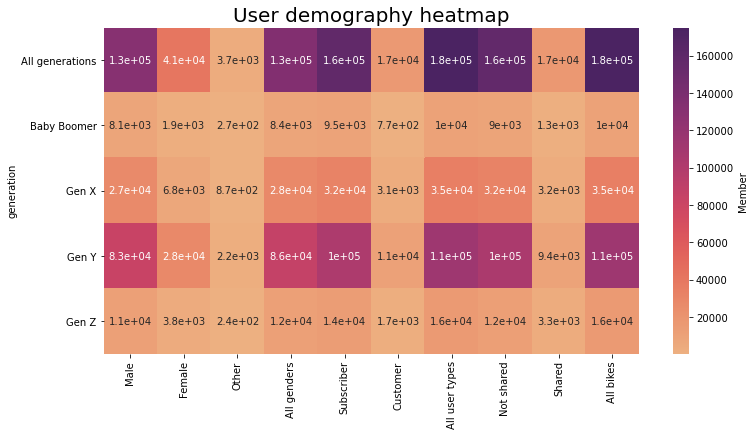

In [116]:
plt.figure(figsize=(12,6))
plt.title("User demography heatmap", fontsize=20)
sb.heatmap(demography, cmap='flare', annot=True, cbar_kws={'label': 'Member'})

The total number of male users of all age groups (including Silent Generation) is 13,0358 which is almost 3.5 times higher than female users, and is 36 times higher than other gender users. 

Number of total subscribers are 158,162 which is 9.5 times higher than customers at 16,615. This is a good sign because subscriber has higher life time value for the service than the customer as the subscriber usually use this service on a day basis. Similar to that, most of the bikes are not shared which means higher value for Ford.

Gen Y Subscriber is the largest group in the heatmap with 102,911 users, 104,493 users in Gen Y don't share a bike and 83435 of them are males. 

Come second across all categories are Gen X users with 27,250 male users, 6,843 female users, 869 other users, a total account of 31,930 subscribers, 3,132 cutomers, 31,832 not shred bike and 3230.

The third most popular group is Gen Z. One theory why Gen Z is not the popular users yet is that not many Gen Z are professionals who work in downtown San Francisco. However, Gen Z users may be blooming in couple years. One way to examinize this is to look at the growth of Gen Z users over the year.

In [113]:
demography

,Male,Female,Other,All genders,Subscriber,Customer,All user types,Not shared,Shared,All bikes
generation,,,,,,,,,,
All generations,130358,40795,3624,133982,158162,16615,174777,157560,17217,174777
Baby Boomer,8090,1892,272,8362,9480,774,10254,8962,1292,10254
Gen X,27350,6843,869,28219,31930,3132,35062,31832,3230,35062
Gen Y,83435,28218,2239,85674,102911,10981,113892,104493,9399,113892
Gen Z,11483,3842,244,11727,13841,1728,15569,12273,3296,15569


#### Duration span by birth year

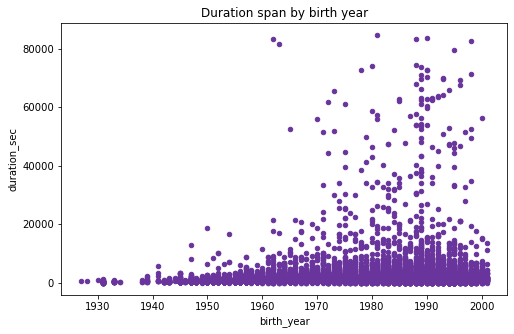

In [137]:
demo.plot.scatter(x='birth_year', y='duration_sec', figsize=(8,5), color=['#69359c'], title="Duration span by birth year")

There is a weak postive correlation of the duration span and the birth year. The younger a user is, the slightly longer that user's trip dureation is.

### Location

#### Stations have have the total visits of more than 5000

In [83]:
most_visited = station[station['total'] > 5000]

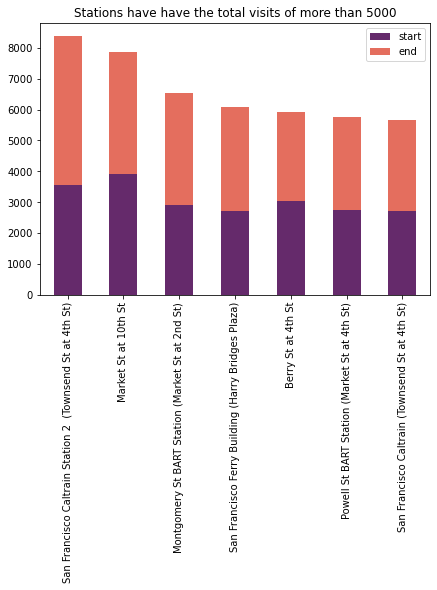

In [148]:
most_visited[['start','end']].plot(kind='bar', stacked=True, figsize=(7,5), color=['#652a6b','#e46e5e'], title="Stations have have the total visits of more than 5000")

These are the 7 most profitable stations of Ford Go Bike with over 5000 visits.

San Francisco Caltrain Station 2 (Townsned St at 4th St) is the most popular destination with 8401 visits.
Come second is Market St at 10th St with 7877 visits. 

Third on the most visited list is Montgomery St BART Station (Market St at 2nd St) with 6542 visits, and is followed by San Francisco Ferry Building (Harry Bridges Plaza) with 6078.


Berry St at 4th St, Powell St BART Station (Market St at 4th St), and San Francisco Caltrain (Townsend St at 4th St) come in 5th, 6th and 7th with 5924, 5757 and 5650 visits respectively.

Ford may want to collect more data on the wait time to get a bike at these top 7 most visited stations to see if there are longer wait times for users. If there're, Ford may want to add more bikes to these stations.

In [85]:
most_visited

,start,end,total
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544,4857,8401
Market St at 10th St,3904,3973,7877
Montgomery St BART Station (Market St at 2nd St),2895,3647,6542
San Francisco Ferry Building (Harry Bridges Plaza),2710,3368,6078
Berry St at 4th St,3052,2872,5924
Powell St BART Station (Market St at 4th St),2760,2997,5757
San Francisco Caltrain (Townsend St at 4th St),2703,2947,5650


#### Stations have have the total visits of less than 50

In [86]:
least_visited = station[station['total'] < 50]

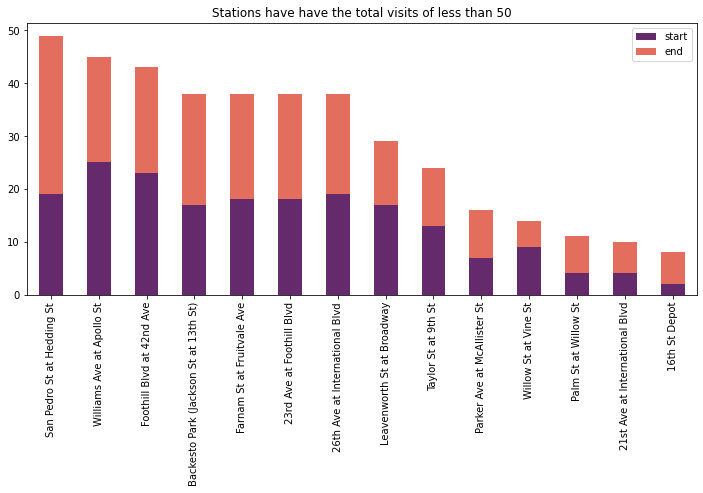

In [149]:
least_visited[['start','end']].plot(kind='bar', stacked=True, figsize=(12,5), color=['#652a6b','#e46e5e'], title="Stations have have the total visits of less than 50")

San Pedro St at Hedding St, Williams Ave at Apollo St and Foothill Blvd at 42nd Ave only have 49, 45 and 43 total visits respectively.

23rd Ave at Foothill Blvd, Backesto Park (Jackson St at 13th St), Farnam St at Fruitvale Ave, and 26th Ave at International Blvd all share the total visits of 38.

The rest of the stations in the list have less than 30 visits.

Ford may want to reconsider whether to continue operate the 14 stations above than have less than 50 visits a month like this. Considering the financially aspect, these stations are potentially operating at a loss. Second, considering customer service, not many customers would be swayed away if these 14 stations were to closed down. Lastly, considering the marketing aspect, these stations do not help with brand awareness or engagement as they surely do not attract enough users.

In [88]:
least_visited

,start,end,total
San Pedro St at Hedding St,19,30,49
Williams Ave at Apollo St,25,20,45
Foothill Blvd at 42nd Ave,23,20,43
Backesto Park (Jackson St at 13th St),17,21,38
Farnam St at Fruitvale Ave,18,20,38
23rd Ave at Foothill Blvd,18,20,38
26th Ave at International Blvd,19,19,38
Leavenworth St at Broadway,17,12,29
Taylor St at 9th St,13,11,24
Parker Ave at McAllister St,7,9,16


#### Most pupular route heatmap

In [89]:
start_id = pd.DataFrame(df2['start_station_id'].value_counts())
end_id = pd.DataFrame(df2['end_station_id'].value_counts())

# combine thew two datasets start_station and end_station by index
station_id = pd.concat([start_id, end_id], axis=1)
# change column names to start and end
station_id = station_id.rename(columns={'start_station_id':'start_id', 'end_station_id':'end_id'})
station_id.head(10)

,start_id,end_id
58,3904,3973
67,3544,4857
81,3052,2872
21,2895,3647
3,2760,2997
15,2710,3368
30,2703,2947
5,2327,2353
22,2293,2034
16,2283,2338


In [90]:
route = {'3':[((df1['start_station_id']=='3') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='3') & (df1['end_station_id']=='3')).sum()],
             '5':[((df1['start_station_id']=='5') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='5') & (df1['end_station_id']=='3')).sum()],
             '15':[((df1['start_station_id']=='15') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='15') & (df1['end_station_id']=='3')).sum()],
             '16':[((df1['start_station_id']=='16') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='16') & (df1['end_station_id']=='3')).sum()],
             '21':[((df1['start_station_id']=='21') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='21') & (df1['end_station_id']=='81')).sum()],
             '22':[((df1['start_station_id']=='22') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='22') & (df1['end_station_id']=='3')).sum()],
             '30':[((df1['start_station_id']=='30') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='30') & (df1['end_station_id']=='3')).sum()],
             '58':[((df1['start_station_id']=='58') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='58') & (df1['end_station_id']=='3')).sum()],
             '67':[((df1['start_station_id']=='67') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='67') & (df1['end_station_id']=='3')).sum()],
             '81':[((df1['start_station_id']=='81') & (df1['end_station_id']=='81')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='67')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='58')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='30')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='22')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='21')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='16')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='15')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='5')).sum(),
                  ((df1['start_station_id']=='81') & (df1['end_station_id']=='3')).sum()]}

In [91]:
id_index = ['81','67','58','30','22','21','16','15','5','3']
route = pd.DataFrame(route)
route.index = id_index

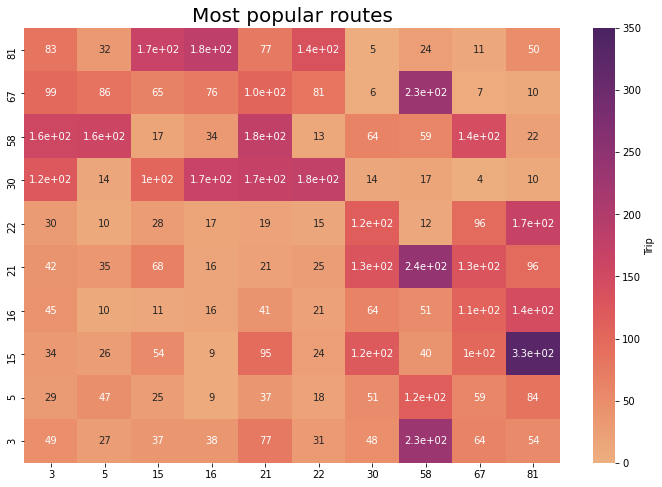

In [111]:
plt.figure(figsize=(12,8))
plt.title("Most popular routes", fontsize=20)
sb.heatmap(route, vmin=0, vmax=350, cmap='flare', annot=True, annot_kws={'size':10}, cbar_kws={'label': 'Trip'})

The most popular route is from station 81 - Berry St at 4th St- to station 15 - San Francisco Ferry Building- in Feb 2019 with 337 trips.

The second popular route starts at station 58 - Market St at 10th St - and ends at station 21 - Montgomery St BART Station.

The third popular route is also starts at station 58, but ends at station 3 which is Powell St BART Station.

The fourth popular route again starts at station 58, but ends at station 67 which is San Francisco Caltrain Station 2

In [93]:
route

,3,5,15,16,21,22,30,58,67,81
81,83,32,166,181,77,135,5,24,11,50
67,99,86,65,76,105,81,6,232,7,10
58,157,158,17,34,178,13,64,59,143,22
30,124,14,103,166,170,175,14,17,4,10
22,30,10,28,17,19,15,115,12,96,168
21,42,35,68,16,21,25,131,243,130,96
16,45,10,11,16,41,21,64,51,108,144
15,34,26,54,9,95,24,121,40,100,327
5,29,47,25,9,37,18,51,116,59,84
3,49,27,37,38,77,31,48,230,64,54


#### Average route duration heat map

In [94]:
route_time = {'3':[df1.query('start_station_id == "3" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "3" & end_station_id == "3"').duration_sec.mean()],
              '5':[df1.query('start_station_id == "5" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "5" & end_station_id == "3"').duration_sec.mean()],
              '15':[df1.query('start_station_id == "15" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "15" & end_station_id == "3"').duration_sec.mean()],
              '16':[df1.query('start_station_id == "16" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "16" & end_station_id == "3"').duration_sec.mean()],
              '21':[df1.query('start_station_id == "21" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "21" & end_station_id == "3"').duration_sec.mean()],
              '22':[df1.query('start_station_id == "22" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "22" & end_station_id == "3"').duration_sec.mean()],
              '30':[df1.query('start_station_id == "30" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "30" & end_station_id == "3"').duration_sec.mean()],
              '58':[df1.query('start_station_id == "58" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "58" & end_station_id == "3"').duration_sec.mean()],
              '67':[df1.query('start_station_id == "67" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "67" & end_station_id == "3"').duration_sec.mean()],
              '81':[df1.query('start_station_id == "81" & end_station_id == "81"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "67"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "58"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "30"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "22"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "21"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "16"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "15"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "5"').duration_sec.mean(),
                    df1.query('start_station_id == "81" & end_station_id == "3"').duration_sec.mean()]}

In [95]:
route_time = pd.DataFrame(route_time)
route_time.index = id_index

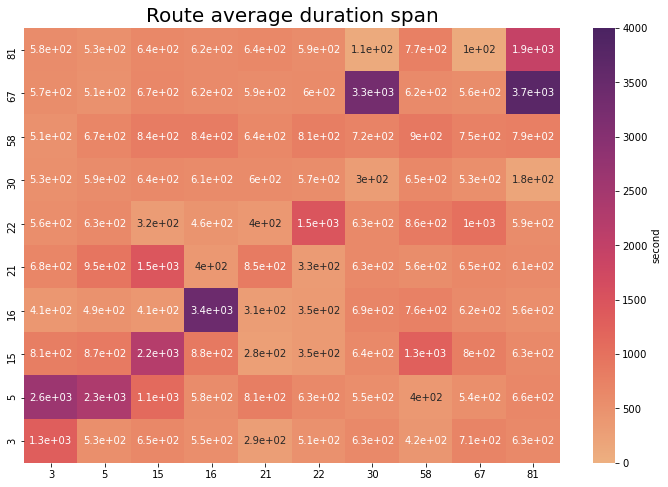

In [112]:
plt.figure(figsize=(12,8))
plt.title("Route average duration span", fontsize=20)
sb.heatmap(route_time, vmin=0, vmax=4000,cmap='flare', annot=True, annot_kws={'size':10}, cbar_kws={'label': 'second'})

The route that has longest duration on average is from station 81, Berry St at 4th St, to station 67, San Francisco Caltrain Station 2 with 563.5 seconds.

Interestingly, come second is a round trip starts and ends at the same station 16, Steuart St at Market St, with the average time span of 3426 seconds.

Third longest duration route is from station 30, San Francisco Caltrain, to station 67, San Francisco Caltrain Station 2, with 3299 seconds.

In [97]:
route_time

,3,5,15,16,21,22,30,58,67,81
81,578.518072,530.156250,644.162651,621.972376,640.714286,591.214815,109.000000,767.833333,100.181818,1940.720000
67,568.757576,513.953488,668.723077,621.684211,591.209524,598.790123,3298.833333,621.827586,563.571429,3721.700000
58,510.974522,674.373418,836.176471,842.794118,643.904494,805.230769,719.500000,903.067797,752.000000,786.818182
30,527.903226,588.785714,636.902913,608.024096,603.347059,565.377143,300.571429,648.117647,533.500000,181.700000
22,558.733333,627.000000,319.892857,458.529412,402.894737,1482.466667,631.260870,859.666667,1021.770833,590.101190
21,677.404762,948.628571,1454.382353,402.562500,852.571429,332.080000,634.923664,563.477366,646.638462,611.656250
16,412.311111,487.400000,410.272727,3426.000000,306.439024,351.761905,694.578125,757.000000,618.120370,556.083333
15,807.147059,870.692308,2209.333333,878.333333,278.242105,345.791667,640.429752,1279.125000,799.610000,633.993884
5,2631.620690,2346.765957,1120.480000,584.555556,810.270270,629.111111,552.000000,400.543103,543.830508,662.071429
3,1324.938776,531.481481,648.081081,554.421053,291.693878,512.548387,631.312500,423.721739,708.937500,632.000000


## Further possible investigations

Although in this project, I chose to break down the data set into three areas - demography, time and location - to explore, there are interesting paths you can go when investigating this data.

One path would be looking across three areas I investigated above. Here are some ideas:

1) Find the peak times of the most popular stations.

2) Look at which user type uses the Ford Go Bike service more each day. Maybe there are more customers riding the bikes in the weekend.

3) Look at which stations have the highest Baby Boomers or Gen Z, and make suggestions if Ford should run some local marketing campaigns there.